In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from viz_utils import *
from dataloaders import *

In [2]:
experiments, meta = load_results(base_dir="results/", dataset="IMDB-sentences", model="JWA")
samplers = list(experiments.keys())
df_tr, df_agr, df_crt_train, df_crt_test, df_attr = results_to_df(experiments, meta, mode="last")

In [4]:
df_attr_avg = df_attr_average(df_attr)


In [13]:
agr = df_agr_average(df_agr)

In [6]:
(train, val, test), vocab = load_imdb(
    max_len=200
)
lengths = [len(ex.text[1]) for ex in test.examples]

In [7]:
cart = df_crt_test.loc[("random", 0)]

In [8]:
correctness = cart.correctness
correctness

array([5., 5., 5., ..., 5., 5., 5.])

In [9]:
easy = np.where(correctness == 5.)[0]
hard = np.where(correctness == 0.)[0]
ambiguous = np.where((correctness == 2.) | (correctness == 3.))[0]

easy_size = np.minimum(100, easy.size)
hard_size = np.minimum(100, hard.size)
ambiguous_size = np.minimum(100, ambiguous.size)
                   
easy = np.random.choice(easy, replace=False, size=easy_size)
hard = np.random.choice(hard, replace=False, size=hard_size)
ambiguous = np.random.choice(ambiguous, replace=False, size=ambiguous_size)

In [10]:
LABEL_MAP = {"1": "positive", "0": "negative"}

In [55]:
texts = []
tokens = []
labels = []

for ex in test[easy]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < 200:
        diff = 200 - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(LABEL_MAP[ex.label[1]])

for ex in test[hard]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < 200:
        diff = 200 - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(LABEL_MAP[ex.label[1]])

for ex in test[ambiguous]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < 200:
        diff = 200 - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(LABEL_MAP[ex.label[1]])


types = ["easy"] * easy_size + ["hard"] * hard_size + ["ambiguous"] * ambiguous_size

In [56]:
df_text = pd.DataFrame({"text": texts, "tokens": tokens, "label": labels, "type": types})

In [57]:
df_text.index = df_attr_cart.index

In [34]:
df_attr_cart_easy = df_attr_avg.take(easy)
df_attr_cart_hard = df_attr_avg.take(hard)
df_attr_cart_amb = df_attr_avg.take(ambiguous)

df_attr_cart = pd.concat([df_attr_cart_easy, df_attr_cart_hard, df_attr_cart_amb])

In [58]:
df_sample = pd.concat([df_text, df_attr_cart], axis=1)

In [59]:
df_sample.iloc[0].tokens

['this',
 'movie',
 'features',
 'some',
 'of',
 'the',
 'best',
 'ensemble',
 'work',
 "i've",
 'seen',
 'in',
 'film',
 'or',
 'on',
 'stage',
 'the',
 'actors',
 'play',
 'off',
 'each',
 'other',
 'with',
 'a',
 'skill',
 'and',
 'that',
 'in',
 'no',
 'way',
 'can',
 'be',
 'achieved',
 'through',
 'editing',
 'br',
 'br',
 'love',
 'jones',
 'a',
 'good',
 'story',
 'period',
 'but',
 'it',
 'is',
 'also',
 'an',
 'excellent',
 'portrayal',
 'of',
 'the',
 'urban',
 'middle',
 'income',
 'twenty',
 'something',
 'african',
 'american',
 'set',
 'that',
 'is',
 'not',
 'often',
 'seen',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 

In [60]:
df_sample.to_csv("IMDB_sample.csv")

In [62]:
dftest = pd.read_csv("IMDB_sample.csv", index_col=0)
dftest

text  \
example                                                      
2168     this movie features some of the best ensemble ...   
2895     my sister a friend and i went to see this film...   
404      here's why this movie fell very short of its p...   
3220     i caught this on late late mexican cable and i...   
2550     before seeing this picture i was quite skeptic...   
...                                                    ...   
1054     after just viewing the movie i must say this i...   
1451     lana turner proved that she could really dance...   
2625     i'm not sure how i can make ten lines out of t...   
1437     hard to get in depth with this kind of stuff s...   
1648     this is a fantastic film the acting is some of...   

                                                    tokens     label  \
example                                                                
2168     ['this', 'movie', 'features', 'some', 'of', 't...  positive   
2895     ['my', 'sister', 'a', 'friend', 'and', 'i', 'w...  positive   
404      ["here's", 'why', 'this', 'movie', 'fell', 've...  negative   
3220     ['i', 'caught', 'this', 'on', 'late', 'late', ...  positive   
2550     ['before', 'seeing', 'this', 'picture', 'i', '...  positive   
...                                                    ...       ...   
1054     ['after', 'just', 'viewing', 'the', 'movie', '...  negative   
1451     ['lana', 'turner', 'proved', 'that', 'she', 'c...  positive   
2625     ["i'm", 'not', 'sure', 'how', 'i', 'can', 'mak...  positive   
1437     ['hard', 'to', 'get', 'in', 'depth', 'with', '...  negative   
1648     ['this', 'is', 'a', 'fantastic', 'film', 'the'...  positive   

              type                                           deeplift  \
example                                                                 
2168          easy  [0.08424149 0.07408251 0.13716415 0.8371065  0...   
2895          easy  [0.21359995 0.21926746 0.15432683 0.19477029 0...   
404           easy  [0.01473294 0.01115419 0.01291647 0.01566623 0...   
3220          easy  [0.09468792 0.07491411 0.07958517 0.11860497 0...   
2550          easy  [0.01077466 0.01472316 0.05492828 0.01246913 0...   
...            ...                                                ...   
1054     ambiguous  [2.45690327e-02 2.49092840e-02 1.42061803e-02 ...   
1451     ambiguous  [0.0796581  0.06125071 0.0416797  0.06896333 0...   
2625     ambiguous  [0.0200738  0.09848103 0.07071008 0.05044249 0...   
1437     ambiguous  [0.02770095 0.06139426 0.04046465 0.06887729 0...   
1648     ambiguous  [0.19644234 0.22005722 0.22323766 0.26758716 0...   

                                                 grad-shap  \
example                                                      
2168     [0.03915779 0.06828688 0.10736714 0.91704094 0...   
2895     [0.08984949 0.23000498 0.08500239 0.19874771 0...   
404      [0.01802358 0.0096462  0.0225422  0.02066915 0...   
3220     [0.04260449 0.02784275 0.01869819 0.03205794 0...   
2550     [0.04096705 0.02445233 0.0531378  0.03136681 0...   
...                                                    ...   
1054     [0.03165153 0.03232326 0.00879337 0.01590419 0...   
1451     [0.06209015 0.01458366 0.01305869 0.01827608 0...   
2625     [0.01477684 0.07109506 0.04704727 0.0324615  0...   
1437     [0.01758169 0.03222196 0.01728358 0.02692999 0...   
1648     [0.12236305 0.14800543 0.1237347  0.1242222  0...   

                                                  int-grad  
example                                                     
2168     [0.05568014 0.07877754 0.14304471 1.10805801 0...  
2895     [0.08528365 0.21051284 0.08159722 0.18169523 0...  
404      [0.0133522  0.00550843 0.02096953 0.02017927 0...  
3220     [0.04626801 0.03100267 0.0218571  0.03695704 0...  
2550     [0.04140281 0.02581463 0.05048905 0.03225942 0...  
...                                                    ...  
1054     [0.02667228 0.02766511 0.00801698 0.01467238 0...  
1451

In [14]:
i = 0
corr = agr[agr.index.get_level_values(0) == i].correlation
crt = df_crt_test[df_crt_test.index.get_level_values(1) == i]

In [16]:
from scipy.stats import pearsonr


for sampler in ["random"]:
    corr_s = corr[corr.index.get_level_values("sampler") == sampler]
    crt_s = crt[crt.index.get_level_values("sampler") == sampler]
    for i, vals in enumerate(corr_s):
        print({corr_s.index[i]})
        print(f"\t Correctness: {pearsonr(vals, crt_s.correctness[0])}")
        print(f"\t Confidence: {pearsonr(vals, crt_s.confidence[0])}")
        print(f"\t Variability: {pearsonr(vals, crt_s.variability[0])}")
        print(f"\t Forgetfulness: {pearsonr(vals, crt_s.forgetfulness[0])}")
        print(f"\t Threshold closeness: {pearsonr(vals, crt_s.threshold_closeness[0])}")
        print(f"\t Lenghts: {pearsonr(vals, lengths)}")

{(0, 'random', ('deeplift', 'grad-shap'))}
	 Correctness: (-0.2873804827069029, 9.879824363119876e-84)
	 Confidence: (-0.36279853297232534, 7.507956261543194e-136)
	 Variability: (0.47670814984762794, 1.8697872884361042e-246)
	 Forgetfulness: (0.12297959680043705, 3.585338233958014e-16)
	 Threshold closeness: (0.5051453543850247, 2.493039129156602e-281)
	 Lenghts: (0.03166231879189624, 0.03649970468451052)
{(0, 'random', ('deeplift', 'int-grad'))}
	 Correctness: (-0.3369117791068581, 2.8650100158844575e-116)
	 Confidence: (-0.4259095915962819, 8.062433024768223e-192)
	 Variability: (0.5704732076717138, 0.0)
	 Forgetfulness: (0.13790166405688423, 5.695710123032392e-20)
	 Threshold closeness: (0.60135029566944, 0.0)
	 Lenghts: (0.028375688357994863, 0.06091114626268404)
{(0, 'random', ('grad-shap', 'int-grad'))}
	 Correctness: (-0.18137851649331332, 1.3893276231134112e-33)
	 Confidence: (-0.21019345628910394, 9.251543423498954e-45)
	 Variability: (0.20839815191559943, 5.177954959122388e-

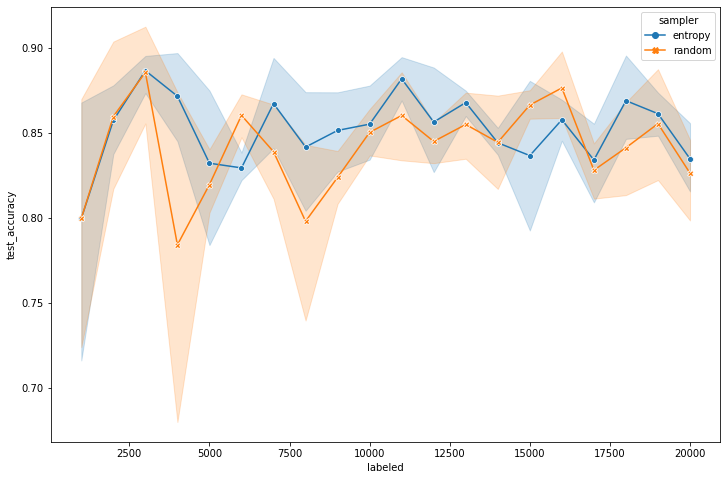

In [81]:
plot_al_accuracy(df_tr, ci=90)

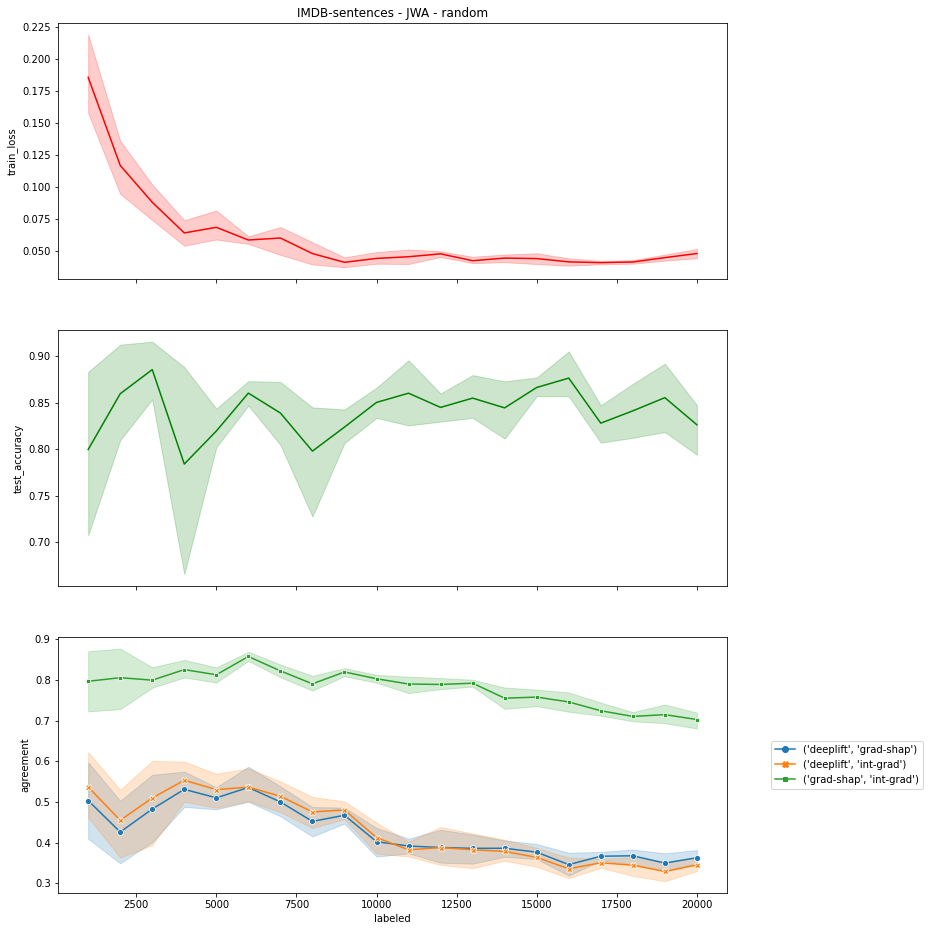

In [82]:
plot_experiment_set(df_tr, df_agr, meta, "random")

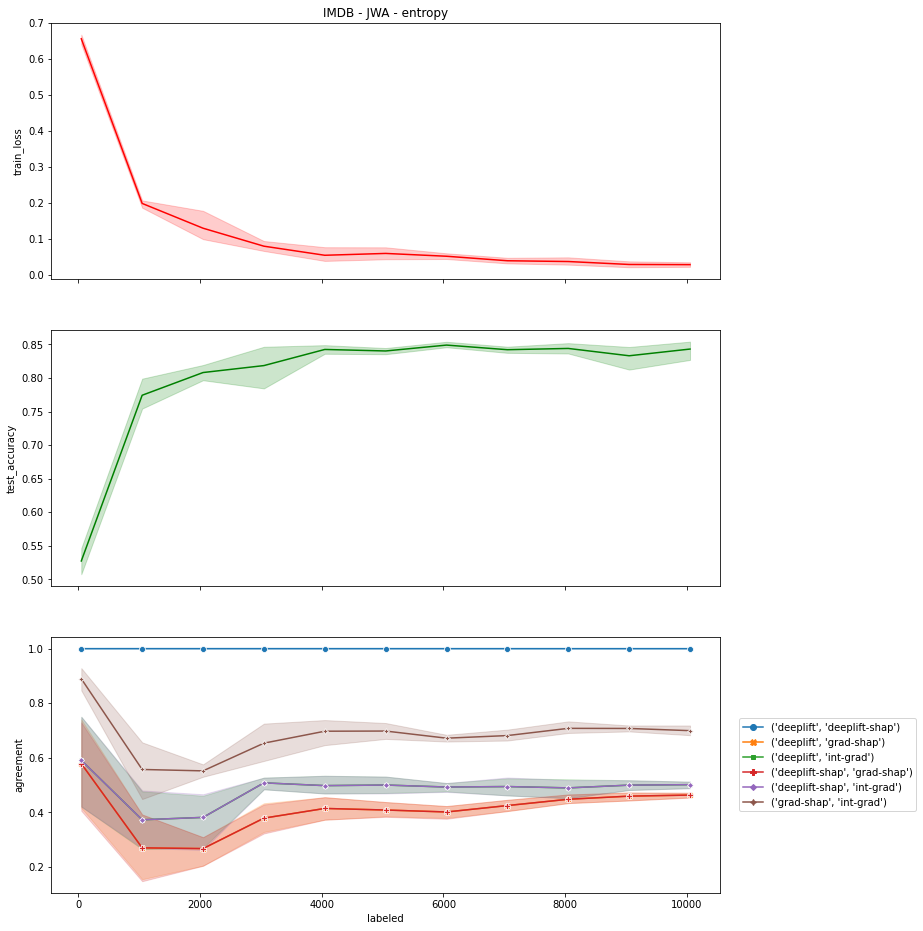

In [5]:
plot_experiment_set(df_tr, df_agr, meta, "entropy")

In [83]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [28]:
def df_average(df, groupby=["al_iter", "sampler"]):
    new_df = df.groupby(groupby).aggregate('mean')
    new_df.labeled = new_df.labeled.astype(int)
    return new_df

In [30]:
df_avg = average_df(df_tr)

In [31]:
df_avg

labeled  train_loss  test_accuracy
al_iter sampler                                    
0       entropy       50    0.656629       0.527389
        random        50    0.656629       0.527389
1       entropy     1050    0.199001       0.774284
        random      1050    0.226029       0.718038
2       entropy     2050    0.130148       0.808114
        random      2050    0.115017       0.751455
3       entropy     3050    0.080189       0.818474
        random      3050    0.106756       0.839927
4       entropy     4050    0.054944       0.842494
        random      4050    0.078755       0.832317
5       entropy     5050    0.060063       0.840248
        random      5050    0.045781       0.837543
6       entropy     6050    0.052225       0.849003
        random      6050    0.048844       0.844281
7       entropy     7050    0.039704       0.842127
        random      7050    0.046072       0.845061
8       entropy     8050    0.037562       0.844006
        random      8050    0.037864       0.840110
9       entropy     9050    0.029376       0.833096
        random      9050    0.031760       0.849278
10      entropy    10050    0.028879       0.843090
        random     10050    0.034435       0.855787

In [14]:
df_tr

labeled  train_loss  test_accuracy  sampler
experiment al_iter                                             
0          0             50    0.672345       0.498739  entropy
           1           1050    0.176514       0.757965  entropy
           2           2050    0.222881       0.797387  entropy
           3           3050    0.091616       0.755444  entropy
           4           4050    0.098119       0.836580  entropy
...                     ...         ...            ...      ...
4          6           6050    0.051663       0.851708   random
           7           7050    0.032887       0.848040   random
           8           8050    0.040243       0.835205   random
           9           9050    0.021466       0.836122   random
           10         10050    0.021430       0.844144   random

[110 rows x 4 columns]

In [13]:
df_avg

labeled  train_loss  test_accuracy
al_iter sampler                                    
0       entropy     50.0    0.656629       0.527389
        random      50.0    0.656629       0.527389
1       entropy   1050.0    0.199001       0.774284
        random    1050.0    0.226029       0.718038
2       entropy   2050.0    0.130148       0.808114
        random    2050.0    0.115017       0.751455
3       entropy   3050.0    0.080189       0.818474
        random    3050.0    0.106756       0.839927
4       entropy   4050.0    0.054944       0.842494
        random    4050.0    0.078755       0.832317
5       entropy   5050.0    0.060063       0.840248
        random    5050.0    0.045781       0.837543
6       entropy   6050.0    0.052225       0.849003
        random    6050.0    0.048844       0.844281
7       entropy   7050.0    0.039704       0.842127
        random    7050.0    0.046072       0.845061
8       entropy   8050.0    0.037562       0.844006
        random    8050.0    0.037864       0.840110
9       entropy   9050.0    0.029376       0.833096
        random    9050.0    0.031760       0.849278
10      entropy  10050.0    0.028879       0.843090
        random   10050.0    0.034435       0.855787

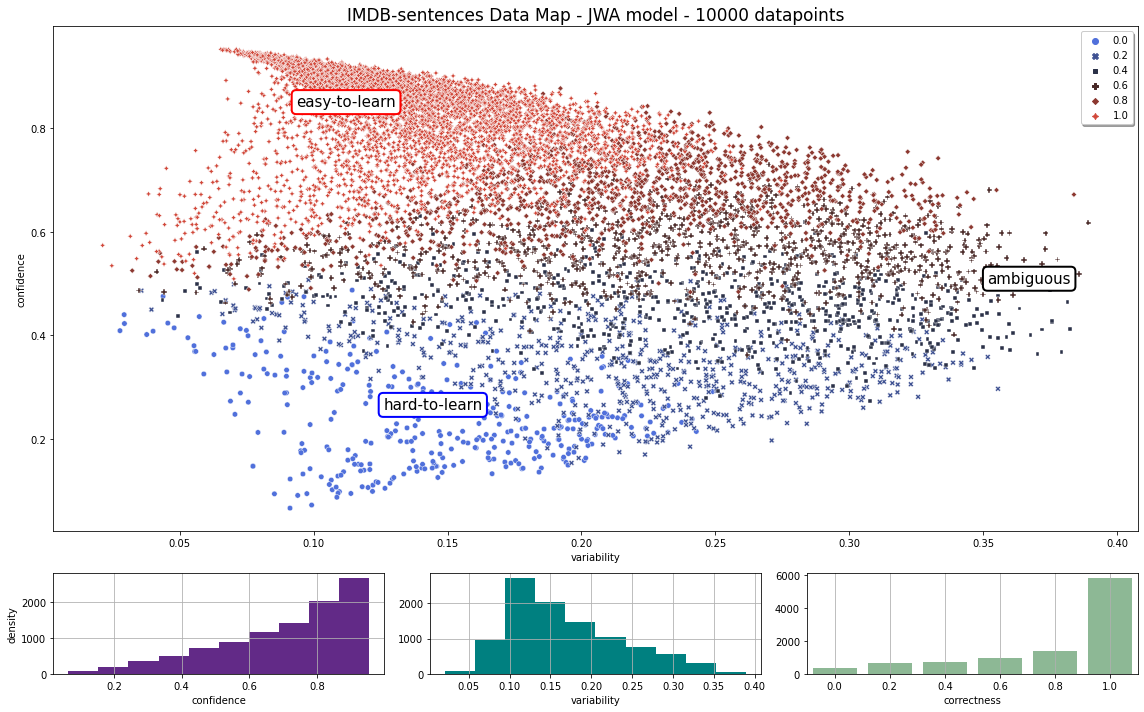

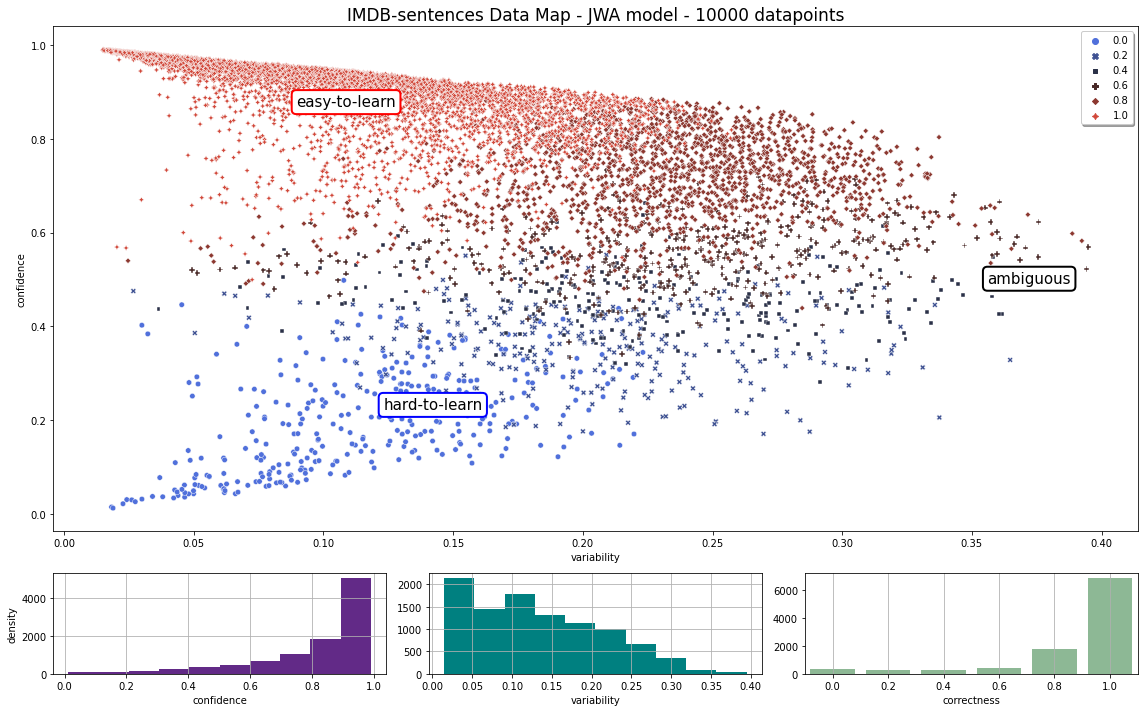

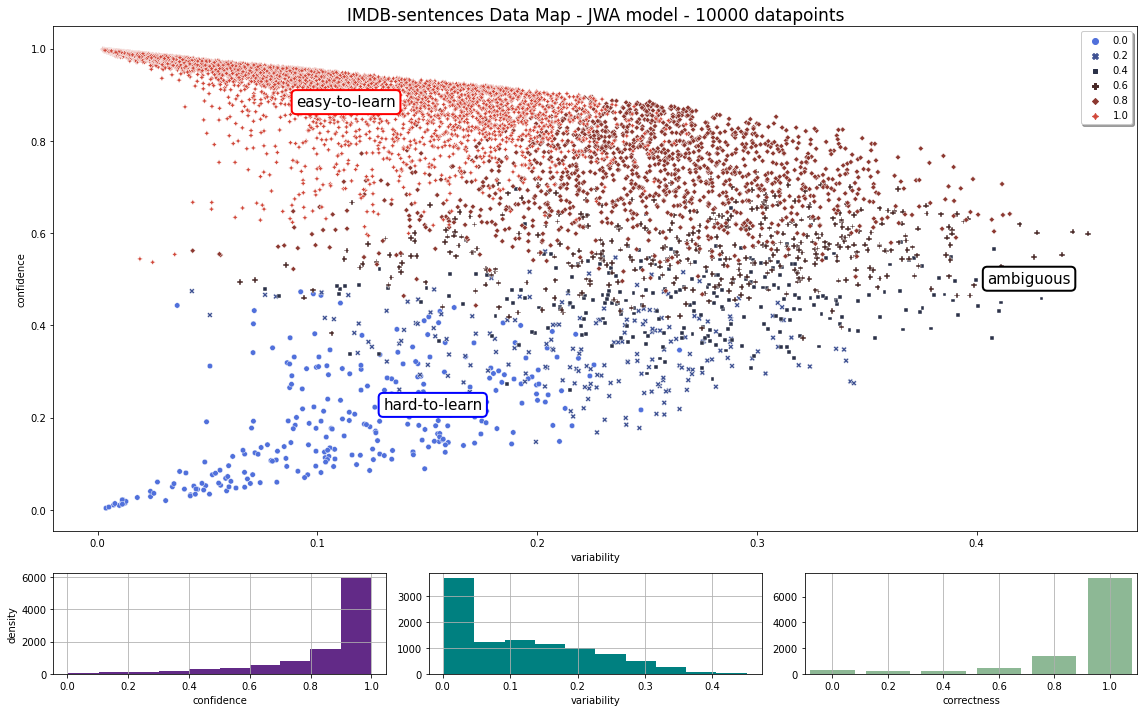

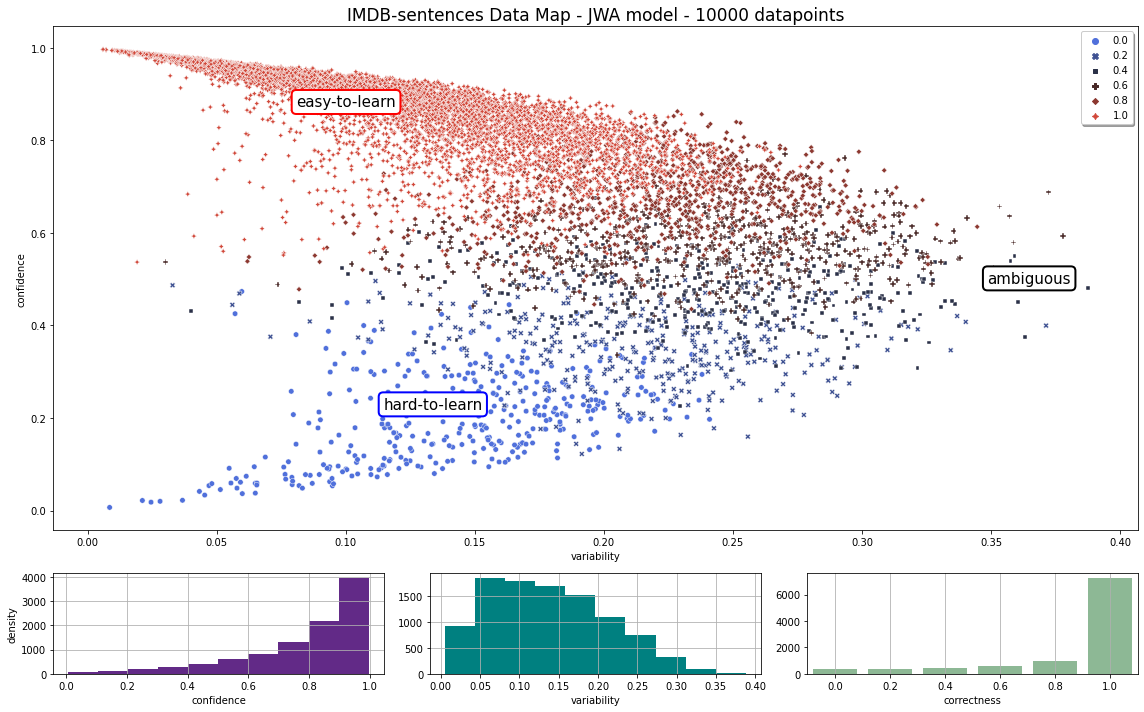

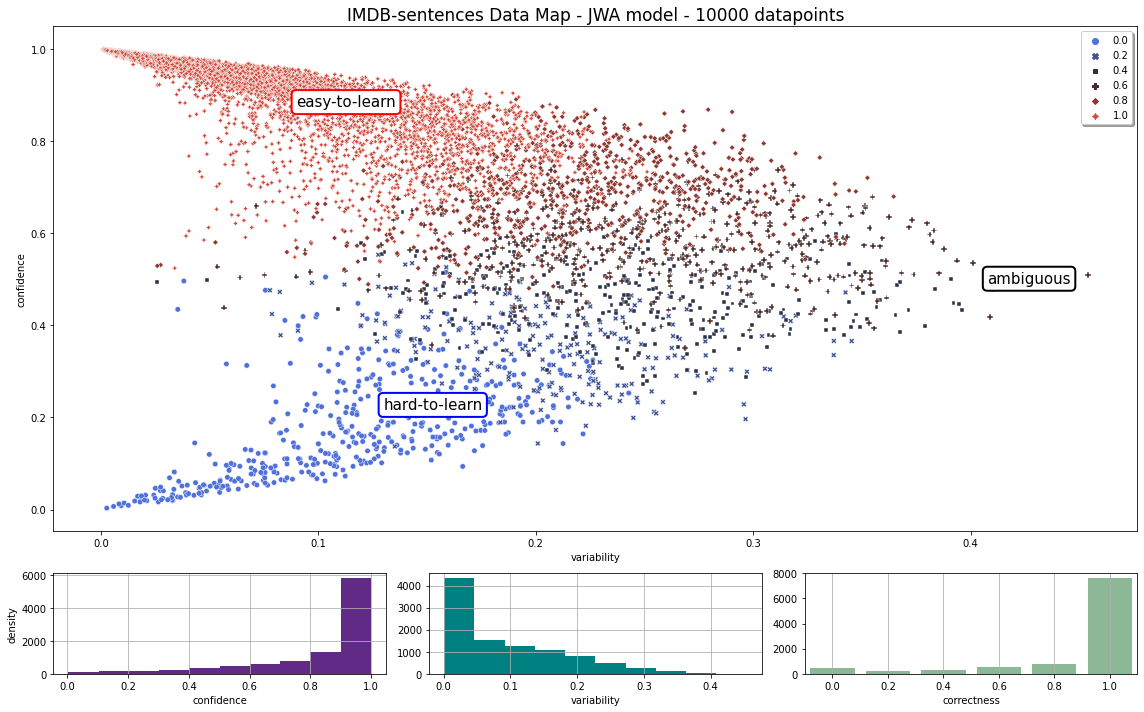

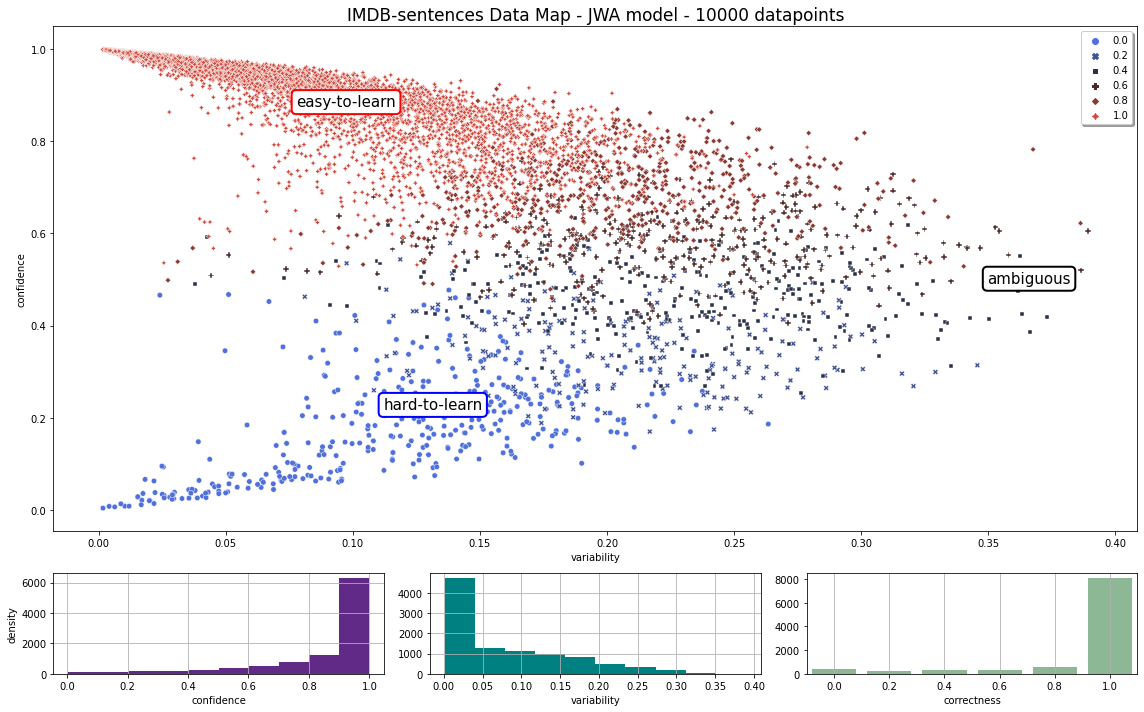

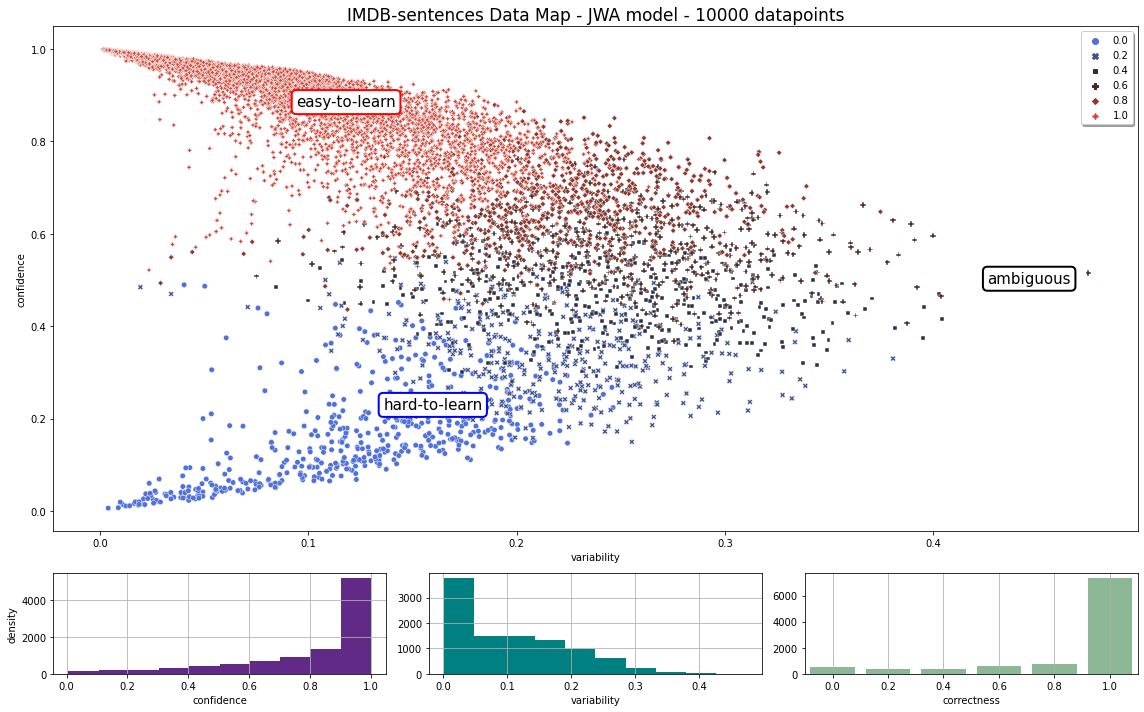

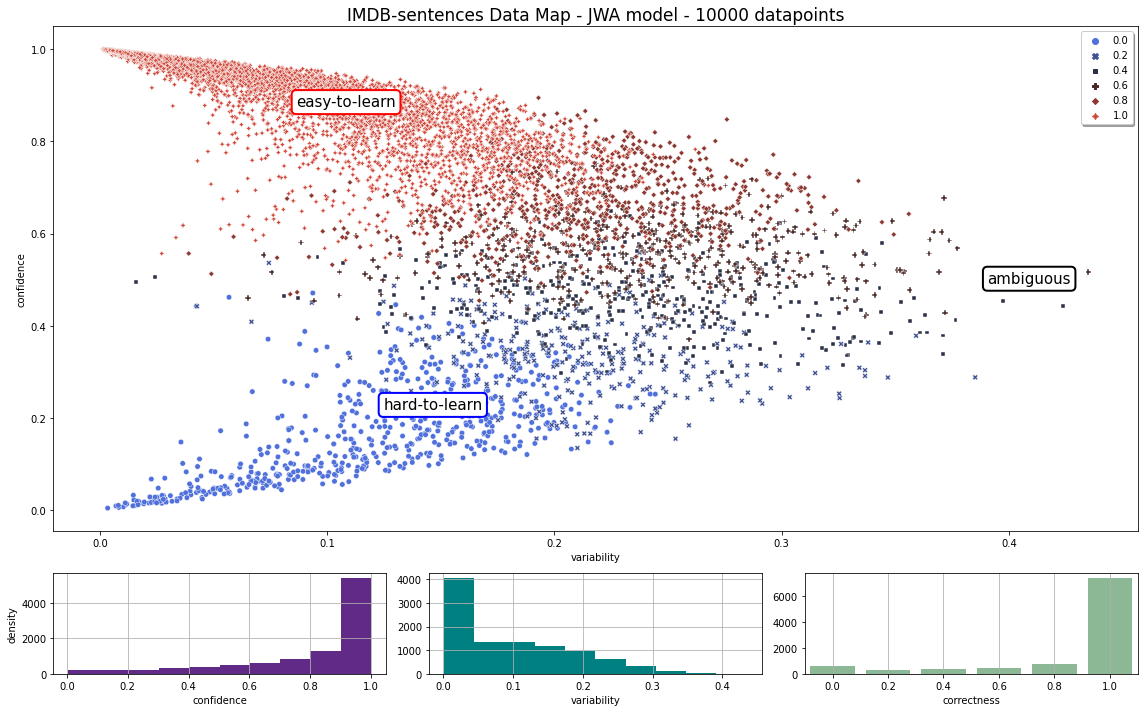

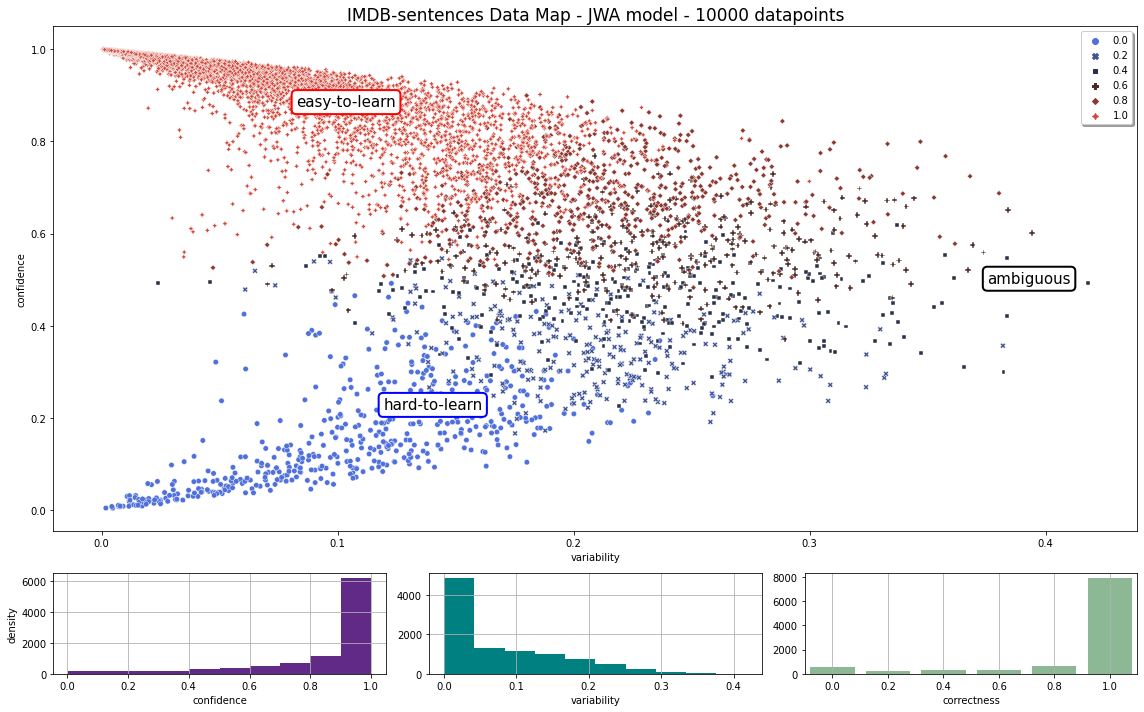

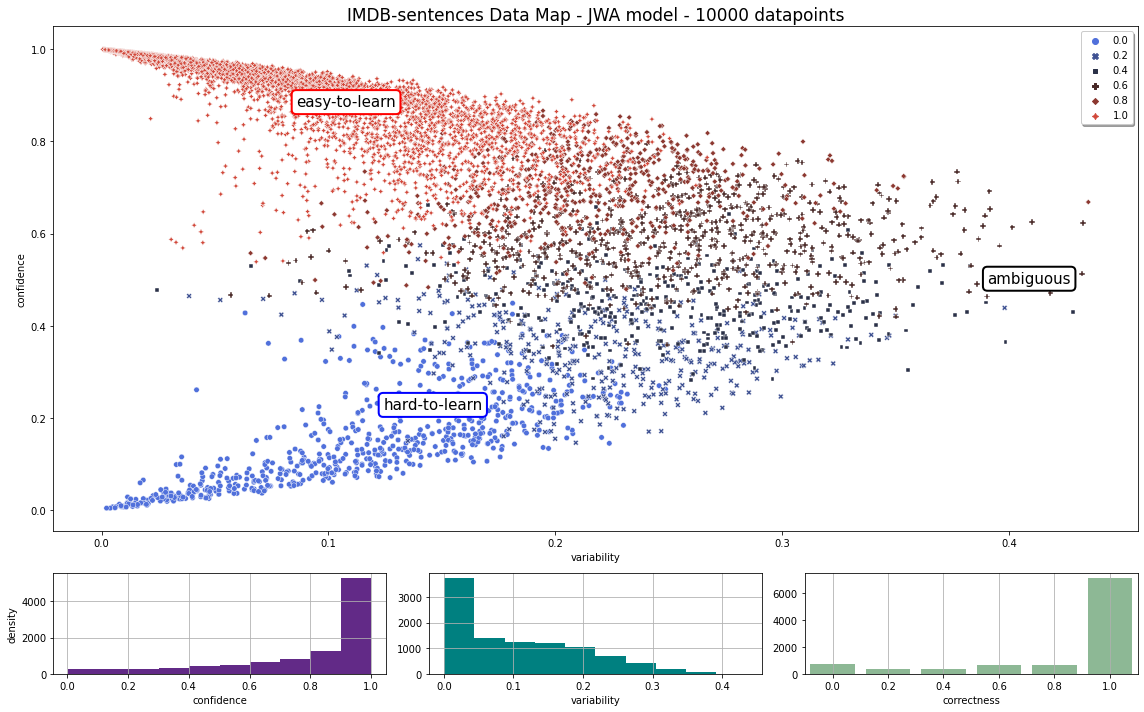

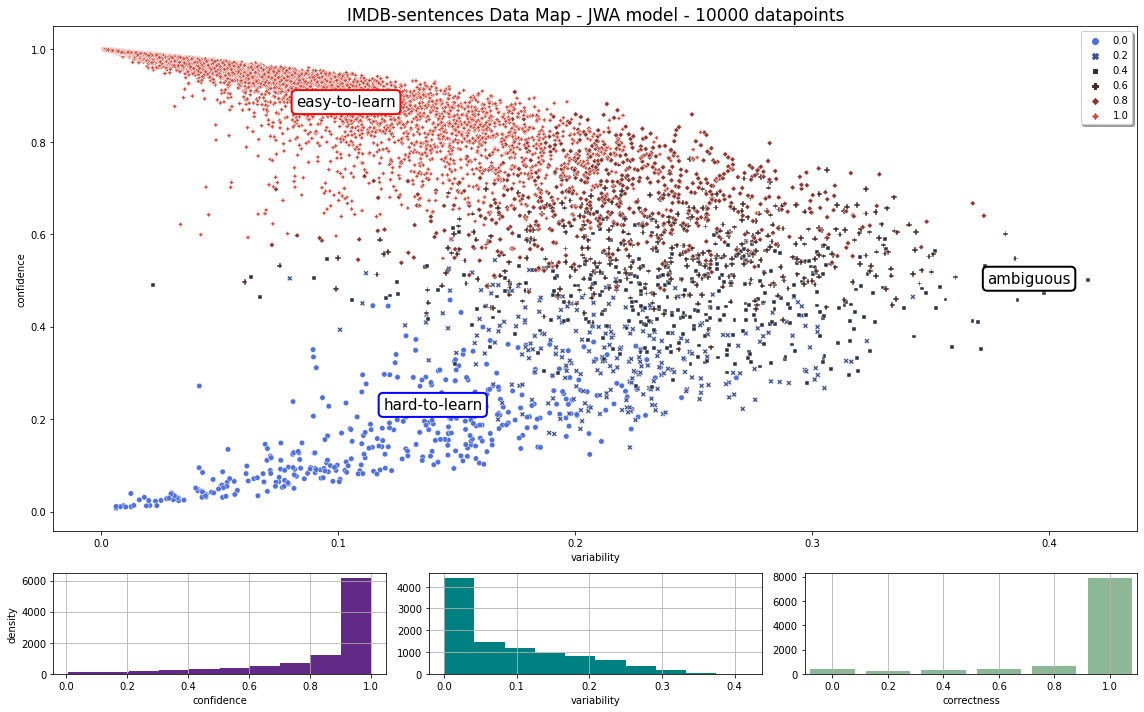

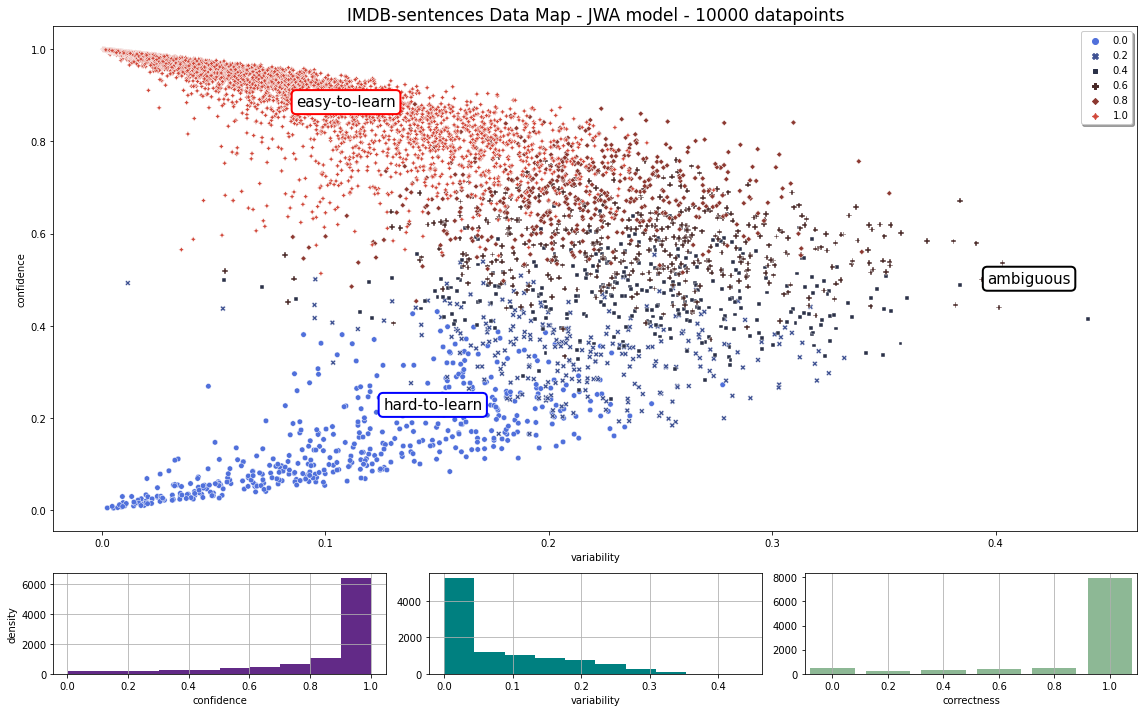

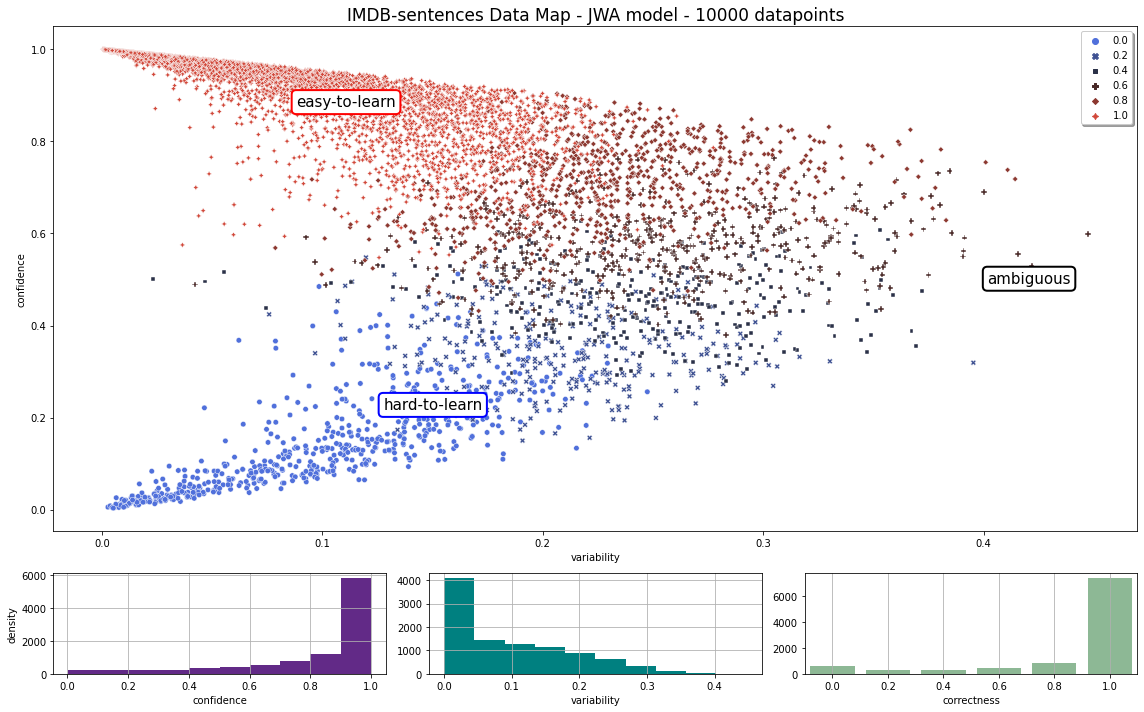

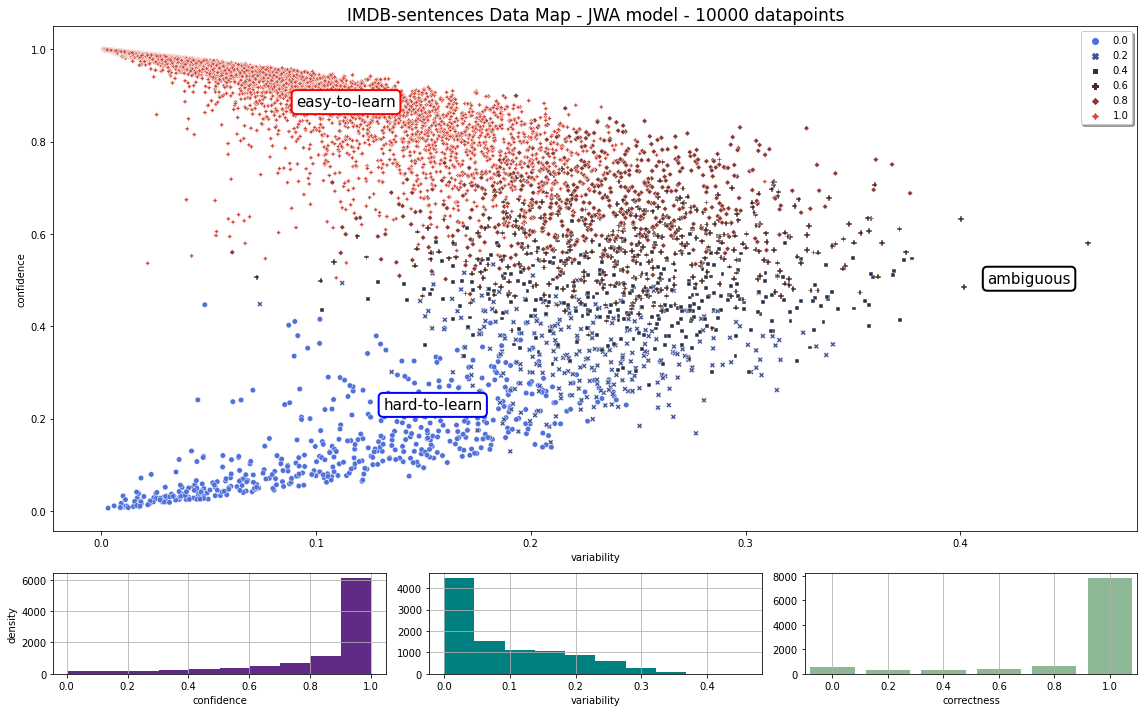

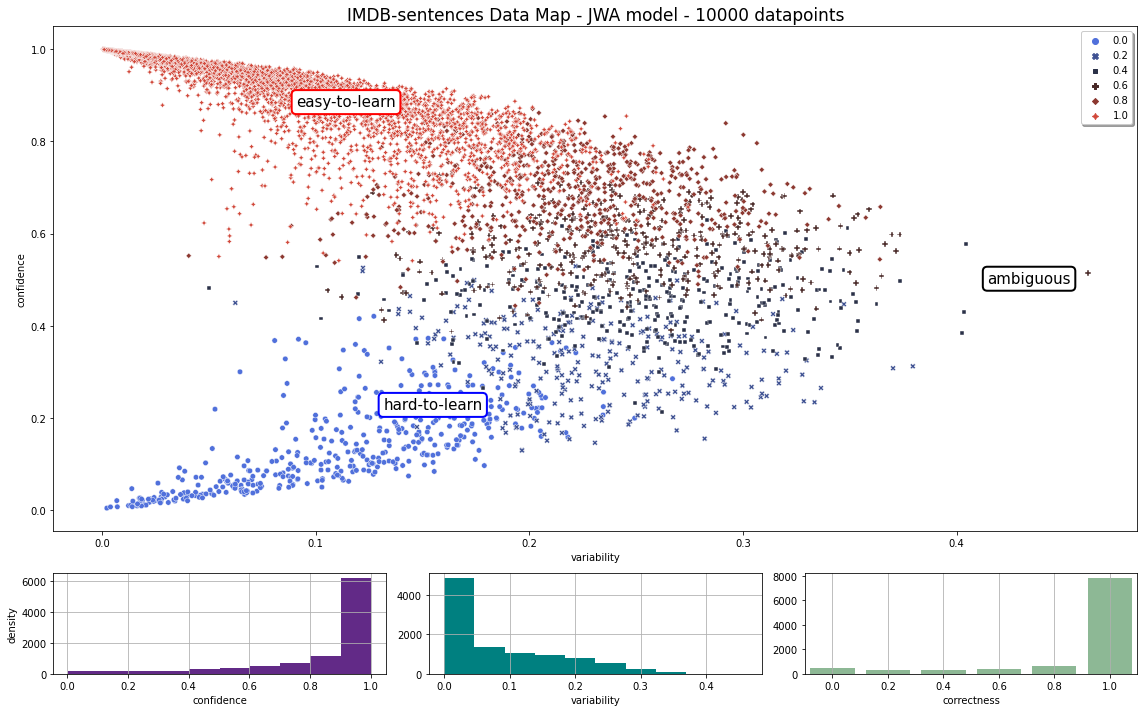

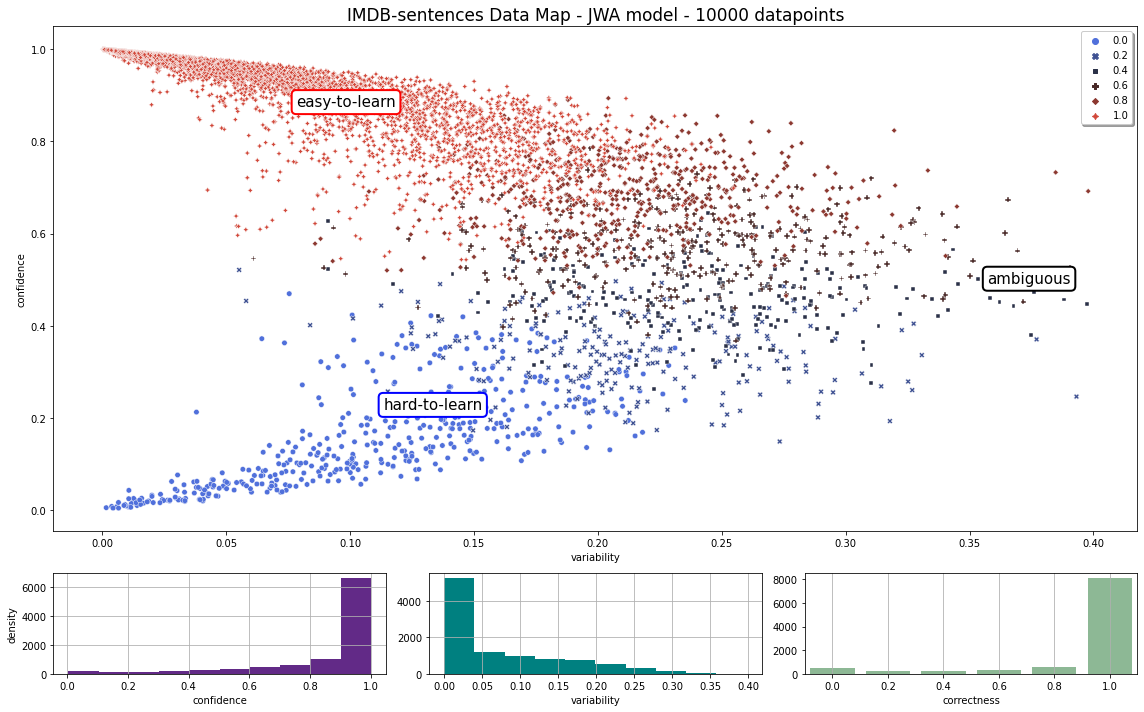

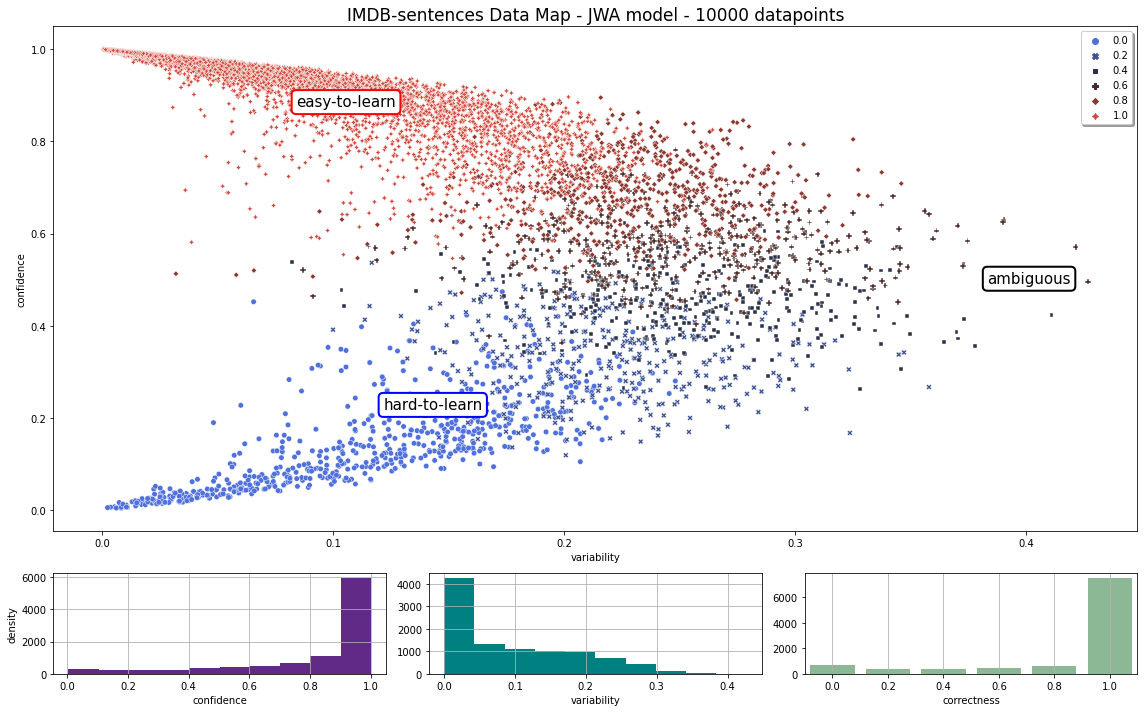

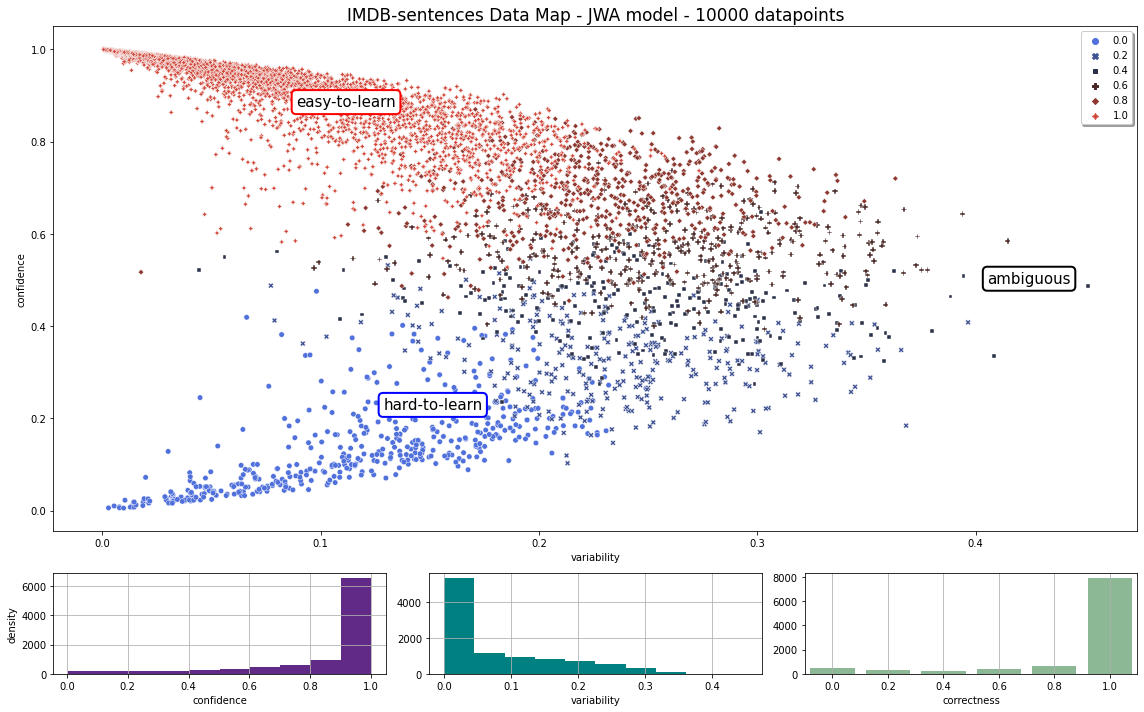

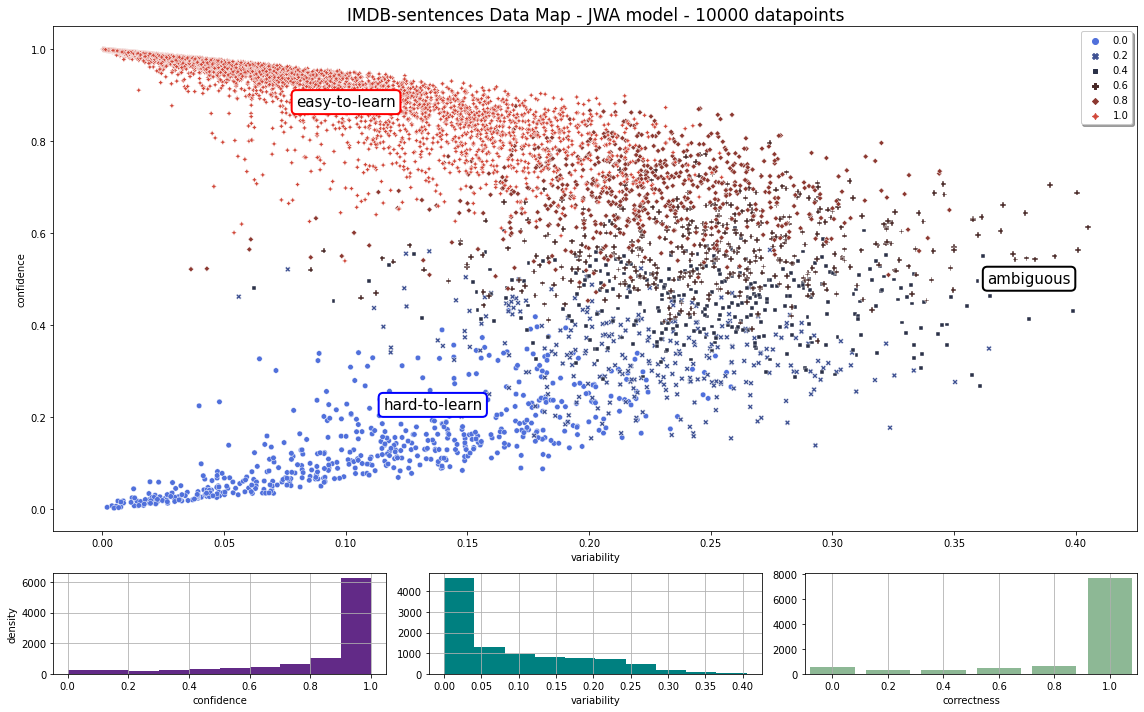

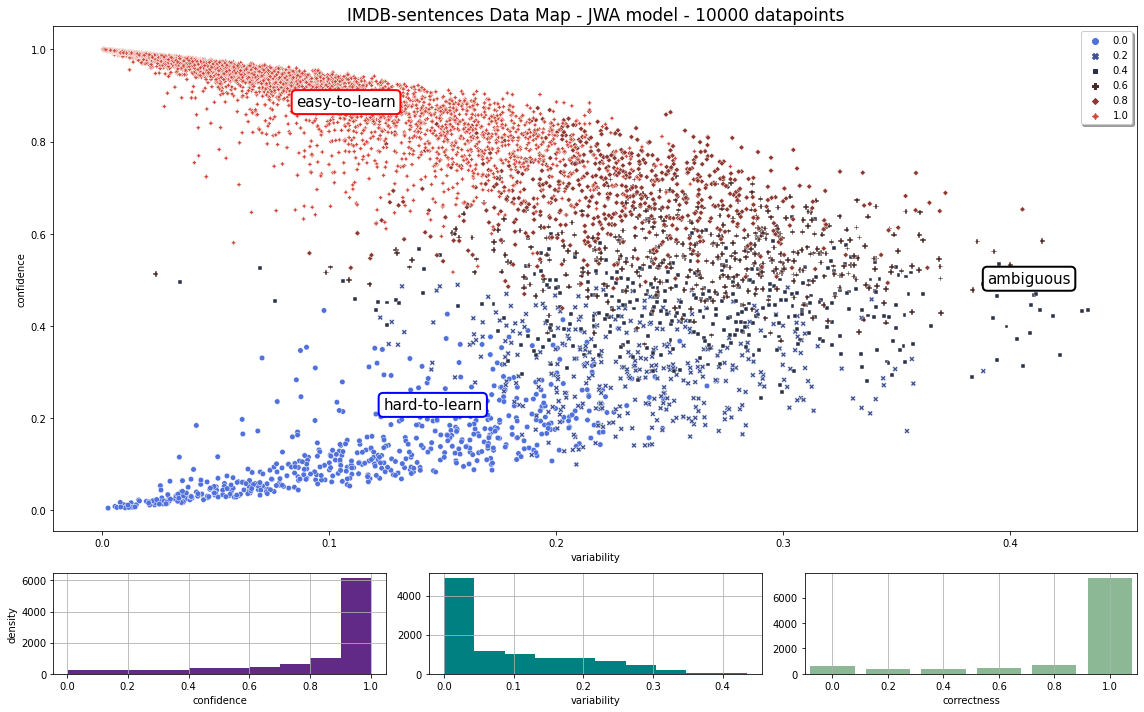

In [84]:
from IPython.display import display, clear_output
import time

df = df_crt_test
sampler = "random"
animate = lambda i: plot_cartography(df, "random", i, meta, hue_metric="correct")

for i in range(len(df[df.index.get_level_values("sampler") == sampler])):
    fig = animate(i)
    clear_output(wait=True)
    display(fig)
    time.sleep(1)
    
clear_output(wait=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

%matplotlib notebook

fig = plt.figure(figsize=(10, 6))


def animate(i):
    df = convert_cartography_df(df_crt_test, "random", frame)
    df = df.assign(corr_frac=lambda d: d.correctness / d.correctness.max())
    df = df.sort_values("corr_frac")
    df["correct"] = [f"{x:.1f}" for x in df["corr_frac"]]
    pal = sns.diverging_palette(
        260, 15, n=meta["epochs_per_train"] + 1, sep=10, center="dark"
    )
    graph = sns.scatterplot(
        x="variability",
        y="confidence",
        data=df,
        ax=ax0,
        hue="correct",
        palette=pal,
        style="correct",
        s=30,
    )
    plt.setp(graph.scatter)


ani = animation.FuncAnimation(
    fig, animate, frames=len(df_crt_test.index), interval=700, repeat=True
)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10))
s = ax.scatter([],[])
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 1)


def animate(i):
    df = convert_cartography_df(df_crt_test, "random", i)
    df = df.assign(corr_frac=lambda d: d.correctness / d.correctness.max())
    df = df.sort_values("corr_frac")
    df["correct"] = [f"{x:.1f}" for x in df["corr_frac"]]
    data = np.stack([df["variability"], df["confidence"]]).T
    s.set_offsets(data)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(df_crt_test), interval=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
def plot_last_epoch(experiment, interpret_pairs):
    agreement_dict = defaultdict(list)
    train_scores = []
    eval_scores = []
    for (al_epoch, (L, A, T, E)) in enumerate(
        zip(
            experiment["labeled"],
            experiment["agreement"],
            experiment["train"],
            experiment["eval"],
        ),
        1,
    ):
        for ip in interpret_pairs:
            agreement_dict[ip].append(list(A)[-1][ip])
        train_scores.append(list(T)[-1]["loss"])
        eval_scores.append(list(E)[-1]["accuracy"] / 100)

    fig, axs = plt.subplots(3, figsize=(12, 10), sharex=True)
    axs[0].scatter(experiment["labeled"], train_scores, color="r")
    axs[0].plot(experiment["labeled"], train_scores, color="r")
    axs[0].set_ylabel("Loss")
    axs[1].scatter(experiment["labeled"], eval_scores, color="g")
    axs[1].plot(experiment["labeled"], eval_scores, color="g")
    axs[1].set_ylabel("Accuracy")
    for ip, agrs in agreement_dict.items():
        axs[2].scatter(experiment["labeled"], agrs)
        axs[2].plot(experiment["labeled"], agrs)

    axs[2].set_ylabel("Agreement")
    axs[2].set_xlabel("# labeled")
    axs[2].legend(interpret_pairs)


def plot_al_agreement(experiment_sets, meta, figsize=(12, 8), ci=90):
    fig, axs = plt.subplots(len(meta["interpret_pairs"]), figsize=figsize)
    if type(axs) is not list:
        axs = [axs]
    for ip, ax in zip(meta["interpret_pairs"], axs):
        dfs = []
        for exp_set, sampler in zip(experiment_sets, samplers):
            _, df_agr, _ = extract_last_epoch(exp_set, meta["interpret_pairs"])
            df_new = df_agr[df_agr.index.get_level_values("interpreter") == ip].copy()
            df_new["sampler"] = sampler
            dfs.append(df_new)

        agr_data = pd.concat(dfs)
        sns.lineplot(
            ax=ax,
            data=agr_data,
            x="labeled",
            y="agreement",
            hue="sampler",
            style="sampler",
            markers=True,
            dashes=False,
            picker=1,
            ci=ci,
        )
        ax.set_title(ip)


def plot_epochwise_trend(results, interpreter):
    agreements = []
    for (al_epoch, (L, A, T, E)) in enumerate(
        zip(
            results["labeled"], results["agreement"], results["train"], results["eval"]
        ),
        1,
    ):

        for a in A:
            agreement = a[interpreter]
            if np.isnan(agreement):
                agreement = 0
            agreements.append(agreement)

    plt.figure(figsize=(20, 8))
    plt.scatter(range(len(agreements)), agreements)
    plt.plot(range(len(agreements)), agreements)
    plt.vlines(
        range(len(A), len(results["labeled"]) * len(A), len(A)),
        ymin=-0.2,
        ymax=1,
        color="r",
    )
    plt.ylabel("Agreeement")
    plt.title(interpreter)